In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np
from tqdm import tqdm

In [67]:
IID_to_income_helper = {}
IID_to_income = {}
IID_to_income_lic = {}
IID_to_employee_num = {}
IID_to_taxes = {}
IID_to_salary = {}
total = {}

column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [68]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [69]:
def one_quarter(column, year, quarter):
    
    df_income = df[(df['year'] == year) & (df['quarter'] == quarter)]
    income_sum = df_income[column].sum()

    df2 = df_income.sort_values(by=column, ascending=False)
    
    IID_to_income_helper = dict(zip(df2['IID'], df2[column]))
    for key in IID_to_income_helper:
        if column == column1:
            IID_to_income[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column2:
            IID_to_income_lic[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column3:
            IID_to_employee_num[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column4:
            IID_to_taxes[(key, year, quarter)] = IID_to_income_helper[key]    
        if column == column5:
            IID_to_salary[(key, year, quarter)] = IID_to_income_helper[key]
        

In [70]:
year = 2021
quarter = 3
one_quarter(column=column1, year=year, quarter=quarter)
one_quarter(column=column2, year=year, quarter=quarter)
one_quarter(column=column3, year=year, quarter=quarter)
one_quarter(column=column4, year=year, quarter=quarter)
one_quarter(column=column5, year=year, quarter=quarter)

In [71]:
def result(IID_to):
    sum = 0
    for key in IID_to.keys():
        for i in range(2019, 2022):
            for j in range(1, 5):
                if (key[0], 2021, 3) in IID_to:
                    sum += IID_to[(key[0], 2021, 3)]
                    total[key[0]] = sum
        sum = 0
    dict(sorted(total.items(), key=lambda item: item[1]))
    df = pd.DataFrame(list(total.items()))
    income_sum = df[1].sum()
    i = 1
    while (df[1][0:i].sum() <= 0.2 * income_sum):
        i += 1
    print("20% count - " + str(i) + " : " + str(df[1][0:i].sum()) + " / " + str(income_sum))

    i1 = 1
    while (df[1][0:i1].sum() <= 0.8 * income_sum):
        i1 += 1
    print("80% count - " + str(i1) + " : " + str(df[1][0:i1].sum()) + " / " + str(income_sum))

    i2 = i1 + 1
    while (df[1][i1:i2].sum() <= 0.15 * income_sum):
        i2 += 1
    print("15% count - " + str(i2-i1) + " : " + str(df[1][i1:i2].sum()) + " / " + str(income_sum))

    print("5% count - " + str(df[1].size - i2))
    
    return df

In [72]:
# income
df_income = result(IID_to_income)

20% count - 17 : 8264101223388.0 / 40383234389316.0
80% count - 764 : 32309774995644.0 / 40383234389316.0
15% count - 1565 : 6058195463928.0 / 40383234389316.0
5% count - 34495


In [73]:
# income_lic
df_income_lic = result(IID_to_income_lic)

20% count - 21 : 304813593870.0 / 1454708590236.0
80% count - 729 : 1168864595256.0 / 1454708590236.0
15% count - 2599 : 218451175452.0 / 1454708590236.0
5% count - 33496


In [74]:
# taxes
df_taxes = result(IID_to_taxes)

20% count - 26 : 989083039356 / 4899762485976
80% count - 1839 : 3920068891500 / 4899762485976
15% count - 25426 : 734968883640 / 4899762485976
5% count - 9559


In [75]:
# employee_num
df_employee_num = result(IID_to_employee_num)

20% count - 75 : 3752329.0 / 18728372.5
80% count - 20827 : 14982868.5 / 18728372.5
15% count - 11825 : 2809896.0 / 18728372.5
5% count - 4172


In [76]:
# taxes and income
AA = AB = AC = BA = BB = BC = CA = CB = CC = 0
income_sum = df_income[1].sum()
taxes_sum = df_taxes[1].sum()


i1 = 0
while (df_income[1][0:i1].sum() <= 0.8 * income_sum):
    i1 += 1
j1 = 0
while(df_taxes[1][0:j1].sum() <= 0.8 * taxes_sum):
    j1 += 1

j2 = j1 + 1
while(df_taxes[1][j1:j2].sum() <= 0.15 * taxes_sum):
    j2 += 1
        
AA = len(list(set(df_income[0][0:i1]).intersection(df_taxes[0][0:j1])))
AB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][0:i1])))
AC = df_income[0][0:i1].size - AA - AB


i2 = i1 + 1
while (df_income[1][i1:i2].sum() <= 0.15 * income_sum):
    i2 += 1

BA = len(list(set(df_income[0][i1:i2]).intersection(df_taxes[0][0:j1])))
BB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][i1:i2])))
BC = df_income[0][i1:i2].size - BA - BB

i3 = i2 + 1
while (df_income[1][i3 - 1] != 0):
    i3 += 1
C = df_income[0][0:i3].size
end = df_income[0].size
CA = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][0:j1])))
CB = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][j1:j2])))
CC = df_income[0][i2:end].size - CA - CB

In [77]:
df_print = pd.DataFrame([[AA, AB, AC], [BA, BB, BC], [CA, CB, CC]], index=['A', 'B', 'C'], columns=['A', 'B', 'C'])
df_print

,A,B,C
A,764,0,0
B,1075,490,0
C,0,24936,9559


In [78]:
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\983169469.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\983169469.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


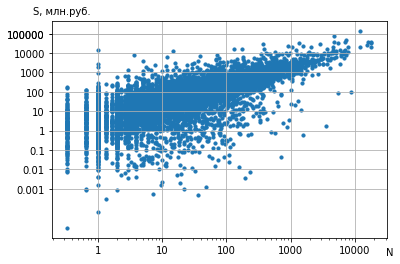

In [79]:
df1 = df[(df['year'] == 2021) & (df['quarter'] == 3) & (df[column1] != 0) & (df[column3] != 0)]
x = list(df1[column3])
y = list(df1[column1])
for i in range(len(y)):
    y[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x, y, s=10, color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

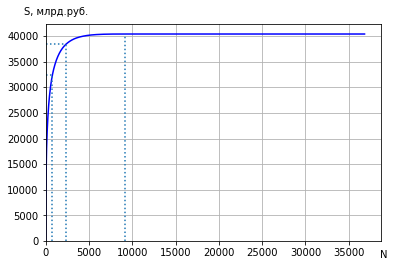

In [80]:
x = [i for i in range(0, df_income[0].size + 1)]
y = []
sum = 0
for i in range(df_income[1].size + 1):
    if i != 0:
        sum += df_income[1][i - 1] / 1e9
    y.append(sum)
    
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles=':')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles=':')
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles=':')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.eps', format='eps')

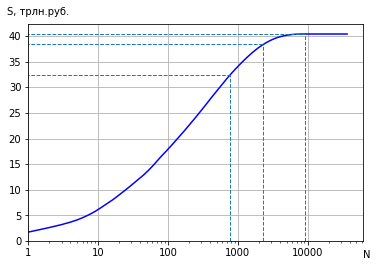

In [81]:
x = [i for i in range(1, df_income[0].size + 1)]
y = []
sum = 0
for i in range(1, df_income[1].size + 1):
    sum += df_income[1][i - 1] / 1e12
    y.append(sum)
    
figure, ax = plt.subplots()
ax.set_ylabel('S, трлн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C, y = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=1)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.eps', format='eps')

In [82]:
taxes_sum = df_taxes[1].sum()
i_taxes1 = 1
while (df_taxes[1][0:i_taxes1].sum() <= 0.8 * taxes_sum):
    i_taxes1 += 1
i_taxes2 = 1
while (df_taxes[1][i_taxes1:i_taxes2].sum() <= 0.15 * taxes_sum):
    i_taxes2 += 1


df_A = pd.DataFrame()
df_B = pd.DataFrame()
df_C = pd.DataFrame()
df2 = df[(df['year'] == 2021) & (df['quarter'] == 3)]
for i in tqdm(df_taxes[0][0:i_taxes1]):
    df_A = pd.concat([df_A, df2[df2['IID'] == i]])
for i in tqdm(df_taxes[0][i_taxes1:i_taxes2]):
    df_B = pd.concat([df_B, df2[df2['IID'] == i]])
for i in tqdm(df_taxes[0][i_taxes2:df_taxes[0].size]):
    df_C = pd.concat([df_C, df2[df2['IID'] == i]])
    

100%|██████████| 9559/9559 [00:09<00:00, 1015.77it/s]


C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\1019857290.py:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\1019857290.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


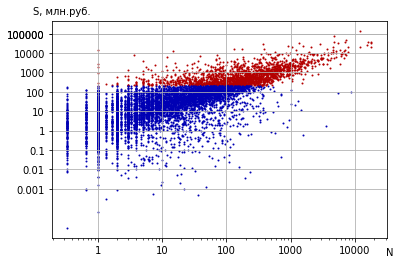

In [83]:
x_A = list(df_A[column3])
y_A = list(df_A[column1])
for i in range(len(y_A)):
    y_A[i] /= 1e6
    
x_B = list(df_B[column3])
y_B = list(df_B[column1])
for i in range(len(y_B)):
    y_B[i] /= 1e6
    
x_C = list(df_C[column3])
y_C = list(df_C[column1])
for i in range(len(y_C)):
    y_C[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.eps', format='eps')

C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\626324827.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\626324827.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


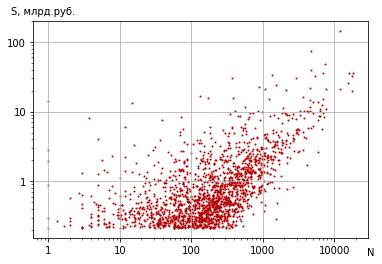

In [84]:
x_A = list(df_A[column3])
y_A = list(df_A[column1])
for i in range(len(y_A)):
    y_A[i] /= 1e9

figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
#ax.scatter(x_B, y_B, s=1, color='#0000b4')
#ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-A.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-A.eps', format='eps')

C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\1818523800.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
C:\Users\gogag\AppData\Local\Temp\ipykernel_15100\1818523800.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


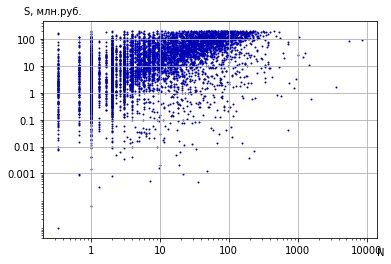

In [85]:
figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
#ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
#ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-B.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-B.eps', format='eps')

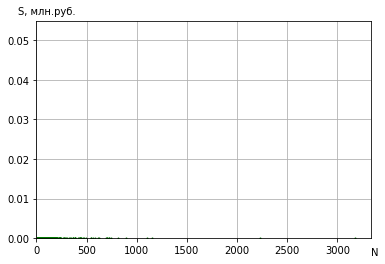

In [86]:
figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
#ax.scatter(x_A, y_A, s=1, color='#b40000')
#ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-С.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-С.eps', format='eps')